# Two-body - Implicit salt and counterions - Protein charge fixed

1. eps = 0.05 kT for not hydrophobic residues
2. heps to be tuned

In [6]:
#Go in the working directory

try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir

/home/marpoli/Work/2_TLL/B2


In [8]:
#Import packages

from __future__ import division, unicode_literals, print_function
from IPython.display import display, HTML
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy import stats 
from math import *
import matplotlib as mpl, matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mtick
import os.path, os, sys, json, filecmp, copy
import mdtraj as md
import numpy as np
import pandas as pd
import statistics as st
#import in_place
import json
import shutil
import csv 
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

plt.rcParams.update({'font.size':14,'legend.frameon':True,'figure.figsize':[12,8],'xtick.major.size':7,'ytick.major.size':7,'legend.labelspacing':1})

## Production runs

In [4]:
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir

#####################################################################
def debye(conc):
    ''' Convert salt concentration (in M) to Debye lenght. 
        Valid at room temperature (25 °C) for 1:1 electrolytes.'''
    return 3.04/np.sqrt(conc)
####################################################################

def mkinput():
    js = {"temperature": 298.15,
             "geometry": {"type":"sphere", "radius":radius},  
               "mcloop": {"macro": macro, "micro": micro},
               "random": {"seed": "hardware"},
               "energy": [{"nonbonded_coulomblj":{
                                       "coulomb": {"type": "poisson", "C":1, "D": -1, "debyelength": debye(salt+buffer), "epsr": 78.7,"cutoff": radius},
                                  "lennardjones": {"mixing": "LB", 
                                                   "custom":{
                                                        "BALA BALA" : { "sigma":hsigma, "eps":heps }, 
                                                        "BALA BILE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BTRP" : { "sigma":hsigma, "eps":heps },     
                                                        "BILE BILE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BVAL" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BTRP" : { "sigma":hsigma, "eps":heps },           
                                                        "BLEU BLEU" : { "sigma":hsigma, "eps":heps }, 
                                                        "BLEU BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BTRP" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPHE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BTRP" : { "sigma":hsigma, "eps":heps },       
                                                        "BPRO BPRO" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPRO BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPRO BTRP" : { "sigma":hsigma, "eps":heps },   
                                                        "BTRP BTRP" : { "sigma":hsigma, "eps":heps },
                                                        "BTRP BVAL" : { "sigma":hsigma, "eps":heps },       
                                                        "BVAL BVAL" : { "sigma":hsigma, "eps":heps }
                                                   }}}}],

"atomlist" : [
            #{"H3PO4":  { "eps":epslj, "q":0, "sigma":4.0 }},
            #{"H2PO4":  { "eps":epslj, "q":-1, "sigma":4.0 }},
            #{"HPO4" :  { "eps":epslj, "q":-2, "sigma":4.0 }},
            #{"PO4"  :  { "eps":epslj, "q":-3, "sigma":4.0}},
            #{"BPTI" :  { "eps":epslj, "q":7.3, "sigma":24.58 }},
            #{"Na"   :  { "eps":epslj, "q": 1, "sigma":3.8, "mw":22.99 }},
            #{"Cl"   :  { "eps":epslj, "q":-1, "sigma":3.4, "mw":35.45 }},
            #{"I"    :  { "eps":epslj, "q":-1, "sigma":4.0 , "mw":1 }},
            #{"SCN"  :  { "eps":epslj, "q":-1, "sigma":4.0 , "mw":1 }},
            {"ASP"  :  { "eps":epslj, "q":-1, "sigma":7.2, "mw":110 }},
            {"CTR"  :  { "eps":epslj, "q":-1, "sigma":4.0 , "mw":16 }},
            {"GLU"  :  { "eps":epslj, "q":-1, "sigma":7.6, "mw":122 }},
            {"HIS"  :  { "eps":epslj, "q":0.5,  "sigma":7.8, "mw":130 }},
            {"SHIS"  :  { "eps":epslj, "q":0.5,  "sigma":7.8, "mw":130 }},
            {"LSHIS"  :  { "eps":epslj, "q":0,  "sigma":7.8, "mw":130 }},
            {"NTR"  :  { "eps":epslj, "q":1,  "sigma":4.0 , "mw":14 }},
            {"SNTR"  :  { "eps":epslj, "q":1,  "sigma":4.0 , "mw":14 }},
            {"LSNTR"  :  { "eps":epslj, "q":0,  "sigma":4.0 , "mw":14 }},
            {"TYR"  :  { "eps":epslj, "q":0, "sigma":8.2, "mw":154 }},
            {"LYS"  :  { "eps":epslj, "q":1,  "sigma":7.4, "mw":116 }},
            {"SLYS" :  { "eps":epslj, "q":1,  "sigma":7.4, "mw":116 }},
            {"LSLYS" :  { "eps":epslj, "q":0, "sigma":7.4, "mw":116 }},
            {"CYS"  :  { "eps":epslj, "q":-1, "sigma":7.2, "mw":103 }},
            {"CYT"  :  { "eps":epslj, "q":0, "sigma":7.2, "mw":103 }},
            {"ARG"  :  { "eps":epslj, "q":1,  "sigma":8.0, "mw":144 }},
            {"SARG" :  { "eps":epslj, "q":1,  "sigma":8.0, "mw":144 }},
            {"LSARG" :  { "eps":epslj, "q":0, "sigma":8.0, "mw":144 }},
            {"ALA"  :  { "eps":epslj, "q":0,  "sigma":6.2, "mw":66 }},
            {"BALA" :  { "eps":epslj, "q":0,  "sigma":6.2, "mw":66 }},
            {"LBALA" :  { "eps":epslj, "q":-1,  "sigma":6.2, "mw":66 }},
            {"ILE"  :  { "eps":epslj, "q":0,  "sigma":7.4, "mw":102 }},
            {"BILE" :  { "eps":epslj, "q":0,  "sigma":7.4, "mw":102 }},
            {"LBILE" :  { "eps":epslj, "q":-1,  "sigma":7.4, "mw":102 }},
            {"LEU"  :  { "eps":epslj, "q":0,  "sigma":7.4, "mw":102 }},
            {"BLEU" :  { "eps":epslj, "q":0,  "sigma":7.4, "mw":102 }},
            {"LBLEU" :  { "eps":epslj, "q":-1, "sigma":7.4, "mw":102 }},
            {"MET"  :  { "eps":epslj, "q":0,  "sigma":7.6, "mw":122 }},
            {"PHE"  :  { "eps":epslj, "q":0,  "sigma":7.8, "mw":138 }},
            {"BPHE" :  { "eps":epslj, "q":0,  "sigma":7.8, "mw":138 }},
            {"LBPHE" :  { "eps":epslj, "q":-1, "sigma":7.8, "mw":138 }},
            {"PRO"  :  { "eps":epslj, "q":0,  "sigma":6.8, "mw":90 }},
            {"BPRO" :  { "eps":epslj, "q":0,  "sigma":6.8, "mw":90 }},
            {"LBPRO" :  { "eps":epslj, "q":-1,  "sigma":6.8, "mw":90 }},
            {"TRP"  :  { "eps":epslj, "q":0,  "sigma":8.6, "mw":176 }},
            {"BTRP" :  { "eps":epslj, "q":0, "sigma":8.6, "mw":176 }},
            {"LBTRP" :  { "eps":epslj, "q":-1, "sigma":8.6, "mw":176 }},
            {"VAL"  :  { "eps":epslj, "q":0,  "sigma":6.8, "mw":90 }},
            {"BVAL" :  { "eps":epslj, "q":0,  "sigma":6.8, "mw":90 }},
            {"LBVAL" :  { "eps":epslj, "q":-1,  "sigma":6.8, "mw":90 }},
            {"SER"  :  { "eps":epslj, "q":0,  "sigma":6.6, "mw":82 }},
            {"THR"  :  { "eps":epslj, "q":0,  "sigma":7.0, "mw":94 }},
            {"ASN"  :  { "eps":epslj, "q":0,  "sigma":7.2, "mw":108 }},
            {"GLN"  :  { "eps":epslj, "q":0,  "sigma":7.4, "mw":120 }},
            {"GLY"  :  { "eps":epslj, "q":0,  "sigma":5.8, "mw":54 }},
            #{"CM"   :  { "eps":epslj, "q":0,  "sigma":0.02, "mw":10000 }},
            #{"SP"   :  { "eps":epslj, "q":3,  "sigma":2.00, "mw":10000 }},
            {"MAN"  :  { "eps":epsmn, "q":0,  "sigma":5.8, "mw":108 }},
            #{"MAP"  :  { "eps":epsmn, "q":0,  "sigma":11.6, "mw":108 }},
            #{"MAQ"  :  { "eps":epsmn, "q":0,  "sigma":17.4, "mw":108 }},
            #{"MAR"  :  { "eps":epsmn, "q":0,  "sigma":40.0, "mw":108 }}
                    ],
          
       
          "moleculelist": [{"protein1": {"traj": Input, "insdir":[0,0,0], "insoffset":[0,0,0], "keepcharges":True}},
                           {"protein2": {"traj": Input, "insdir":[0,0,0], "insoffset":[0,0,50], "keepcharges":True}},
                          ],
          
          "insertmolecules": [{"protein1": {"N": 1, "inactive": False }},
                              {"protein2": {"N": 1, "inactive": False }},
                             ],
          
          "moves":[{"conformationswap":{"molecule":"protein1", "repeat":1}},
                   {"conformationswap":{"molecule":"protein2", "repeat":1}},
                   {"moltransrot": {"molecule": "protein1", "dir":[0,0,0], "dprot":1, "dp":0,  "repeat": 1}},
                   {"moltransrot": {"molecule": "protein2", "dir":[0,0,1], "dprot":1, "dp":15,  "repeat": 1}},
                  ],
  

          "analysis": [
            
            {"qrfile": {"nstep":1000, "nskip": nskip}}, # To visualize charge titration
            {"density": { "nstep": 1000, "nskip": nskip}}, # Average molecules concentration in moleculelist ,<N/V>, in out.json file and rho-name.dat files
            {"multipole": {"nstep": 1000, "nskip": nskip} }, # Average charge of protein in out.json file
            {"savestate": {"file": "state.json"} },  # To restart the simulation
            {"savestate": {"file": "confout.pqr"} }, # Save the last configuration
            {"xtcfile": {"file": "traj.xtc", "nstep": 1000, "nskip": nskip} }, # Simulation trajectory 
            {"systemenergy": {"file": "energy.dat", "nstep": 1000, "nskip": nskip} }, # Energy
            {"virtualtranslate": {"file": "vt.dat", "dL": 0.2, "molecule": "protein2", "nstep": 1, "dir": [0,0,1], "nskip": nskip}},
            {"reactioncoordinate": {"file": "R.dat", "nstep": 1, "type": "molecule", "property": "com_z", "index":1, "nskip": nskip}},
            {"moleculeconformation": { "molecule": "protein1", "nstep": 1,  "nskip": nskip}},
            {"moleculeconformation": { "molecule": "protein2", "nstep": 1,  "nskip": nskip}},
              
            #Total charge as a function of the number of steps
            {"reactioncoordinate": {"file": "Q_total.dat", "nstep": 1000, "type": "system", "property": "Q", "nskip": nskip}},
            #{"reactioncoordinate": {"file": "Q_protein.dat", "nstep":1000, "type": "molecule", "index": 0, "property": "Q", "nskip": nskip}},
            #{"multipoledist": {"file": "multipole.dat","molecules": ['protein1', 'protein2'] , "dr": 0.1, "nstep": 1, "nskip": nskip} }, 
          
          ]} 

    with open('input.json', 'w') as f:
        json.dump(js, f, indent=4)

        
        
######################################################## Input Parameters ####################################################

to_kJmol =2.476

#####################################################################################################################
proteins = {'TLL_wildtype': {'eps': [0.05*to_kJmol], 'heps':[0.402*to_kJmol, 0.404*to_kJmol, 0.406*to_kJmol], 'input':workdir+'/tll-close_open.pqr'}}#
#####################################################################################################################

#LJ parameters
epsmn = 0.005*to_kJmol # eps for MAN residue
hsigma = 7.0 

#Salt 
buffer = 0 # mM
salt = 0.105 #mM
                                                                                                                
# Steps                                                                                                         

micro = 1000                                                                                                  
macro = 10001

nskip = 1000

radius = 120
###############################################################################################################################

    
for name, prop in proteins.items():
    %mkdir $name
    %cd -q $name
    for epslj in prop['eps']:
        %mkdir $epslj
        %cd -q $epslj
        for heps in prop['heps']:
            %mkdir $heps
            %cd -q $heps
            for g in range(5):
                %mkdir $g
                %cd $g
                Input = prop['input']
                mkinput()
                exists = os.path.isfile('state.json')
                if exists:
                    !sbatch $workdir/submit_state.sh   

                else:
                    !sbatch $workdir/submit.sh
                %cd -q ../
            %cd -q ../
        %cd -q ../
    %cd -q ../

/home/marpoli/Work/2_TLL/B2
mkdir: cannot create directory ‘TLL_wildtype’: File exists
mkdir: cannot create directory ‘0.12380000000000001’: File exists
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/0
Submitted batch job 4752919
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/1
Submitted batch job 4752920
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/2
Submitted batch job 4752921
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/3
Submitted batch job 4752922
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/4
Submitted batch job 4752923
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.000304/0
Submitted batch job 4752924
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.000304/1
Submitted batch job 4752925
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.000304/2
Submitted batch job 4752926
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.1238

In [12]:
!squeue -u marpoli
#!scancel 

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           5039051      snic series2-  marpoli  R 6-18:03:54      1 au171
           5039052      snic series2-  marpoli  R 6-18:03:54      1 au226
           5039049      snic series2-  marpoli  R 6-18:05:18      1 au149


### Charge and energy equilibration check

/home/marpoli/Work/2_TLL/B2
/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/0


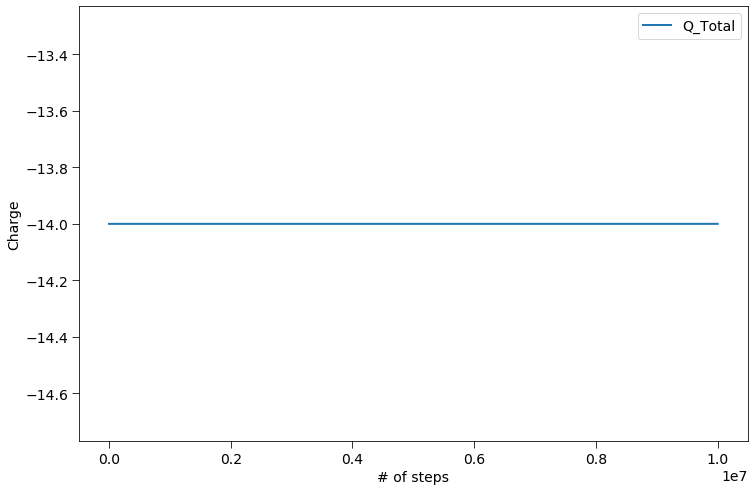

/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.000304/0


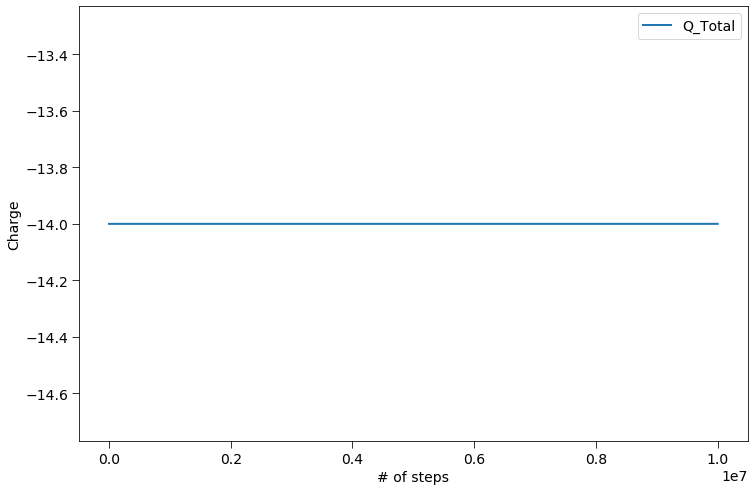

/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.0052560000000001/0


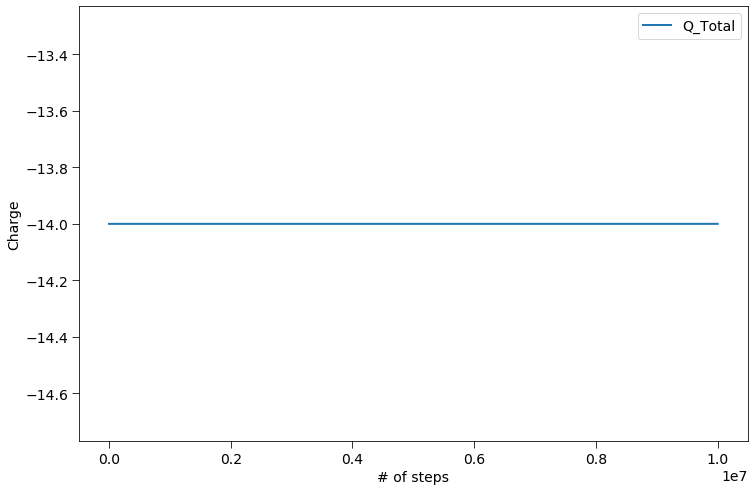

/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/0.995352/0


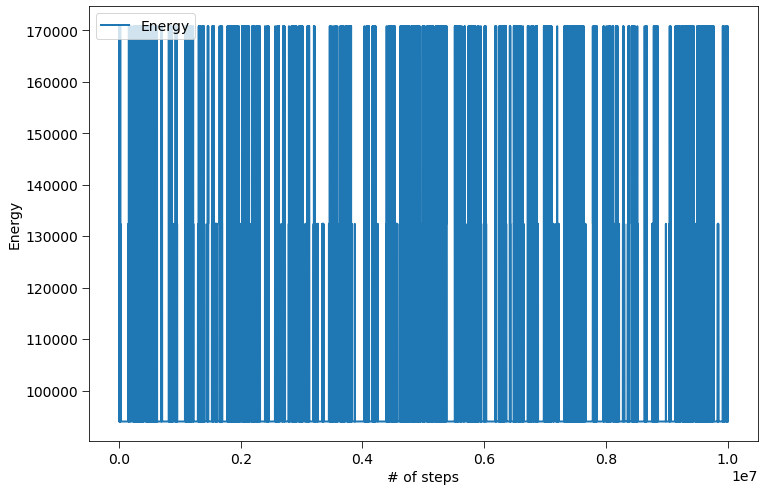

/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.000304/0


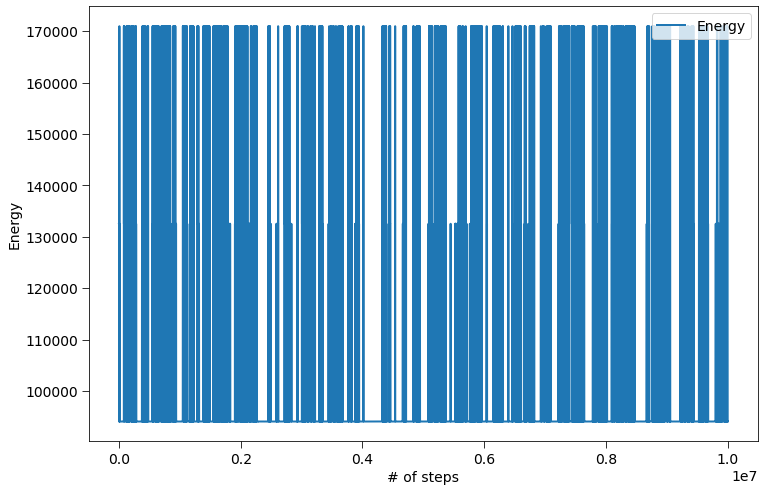

/home/marpoli/Work/2_TLL/B2/TLL_wildtype/0.12380000000000001/1.0052560000000001/0


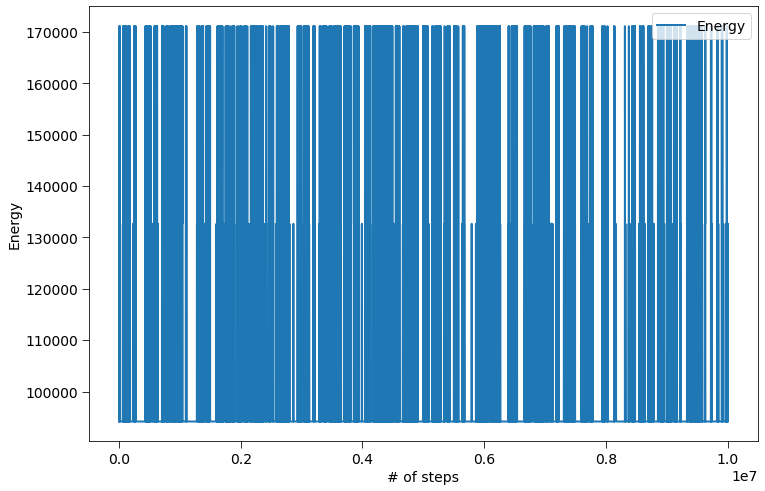

In [11]:
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir/
###################

to_kJmol =2.476
###################################################################################################################################################
proteins = {'TLL_wildtype': {'eps': [0.05*to_kJmol], 'heps':[0.402*to_kJmol, 0.404*to_kJmol, 0.406*to_kJmol], 'input':workdir+'/tll-close_open.pqr'}}#
###################################################################################################################################################
for name, prop in proteins.items():
    %cd -q $name
    for epslj in prop['eps']:
        %cd -q $epslj
        for heps in prop['heps']:
            %cd -q $heps
            for g in range(1):
                %cd $g
                x1, y1, z1 = np.loadtxt('Q_total.dat',unpack=True)
                plt.plot(x1, y1, label='Q_Total', lw=2)
                plt.xlabel('# of steps')
                plt.ylabel('Charge')
                plt.legend()
                plt.show()
                %cd -q ../
            %cd -q ../
        %cd -q ../
    %cd -q ../

for name, prop in proteins.items():
    %cd -q $name
    for epslj in prop['eps']:
        %cd -q $epslj
        for heps in prop['heps']:
            %cd -q $heps
            for g in range(1):
                %cd $g
                x2, y2 = np.loadtxt('energy.dat',unpack=True, usecols=(0,1))
                plt.plot(x2, y2, label='Energy', lw=2)
                plt.xlabel('# of steps')
                plt.ylabel('Energy')
                plt.legend()
                plt.show()
                %cd -q ../
            %cd -q ../
        %cd -q ../
    %cd -q ../
